<a href="https://colab.research.google.com/github/jhanani14/Loan_Eligibility_Predictor/blob/main/Loan_Eligibility_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from IPython.display import display, Markdown

In [ ]:
# Load the dataset
df = pd.read_csv("/laon-predictor-train.csv")
df.drop('Loan_ID', axis=1, inplace=True)

# Fill missing values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Encode categorical columns
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Features and Target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Test predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)

# AUC
auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Display Comparison
print("📊 Model Performance:")
print(f"Logistic Regression  ➤ Accuracy: {acc_lr:.3f} | AUC: {auc_lr:.3f}")
print(f"Random Forest        ➤ Accuracy: {acc_rf:.3f} | AUC: {auc_rf:.3f}")

# Choose best model
best_model = rf if acc_rf > acc_lr else lr
best_model_name = "Random Forest" if best_model == rf else "Logistic Regression"


📊 Model Performance:
Logistic Regression  ➤ Accuracy: 0.789 | AUC: 0.739
Random Forest        ➤ Accuracy: 0.756 | AUC: 0.754


In [ ]:
#  Edit this section to test different inputs
custom_input = {
    'Gender': 1,               # 1 = Male
    'Married': 1,              # 1 = Yes
    'Dependents': 0,           # 0 = None
    'Education': 1,            # 1 = Graduate
    'Self_Employed': 0,        # 0 = No
    'ApplicantIncome': 6000,   # Try 3000 or 10000
    'CoapplicantIncome': 1500,
    'LoanAmount': 120,
    'Loan_Amount_Term': 360,
    'Credit_History': 1.0,     # 1.0 = Good credit
    'Property_Area': 2         # 2 = Urban
}


In [ ]:
# Convert input to DataFrame
sample_df = pd.DataFrame([custom_input])

# Scale input
scaled_sample = pd.DataFrame(scaler.transform(sample_df), columns=X.columns)

# Predict
prediction = best_model.predict(scaled_sample)[0]

# Display final result
display(Markdown(f"## 🔍 Prediction using **{best_model_name}**:"))
if prediction == 1:
    display(Markdown("### ✅ **Loan Approved!**"))
else:
    display(Markdown("### ❌ **Loan Denied!**"))


## 🔍 Prediction using **Logistic Regression**:

### ✅ **Loan Approved!**

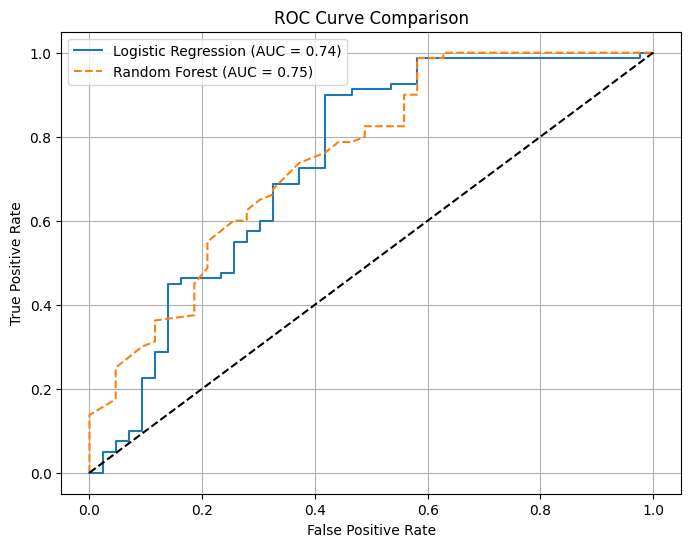

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability scores
lr_probs = lr.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

# Calculate ROC values
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# AUC scores
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


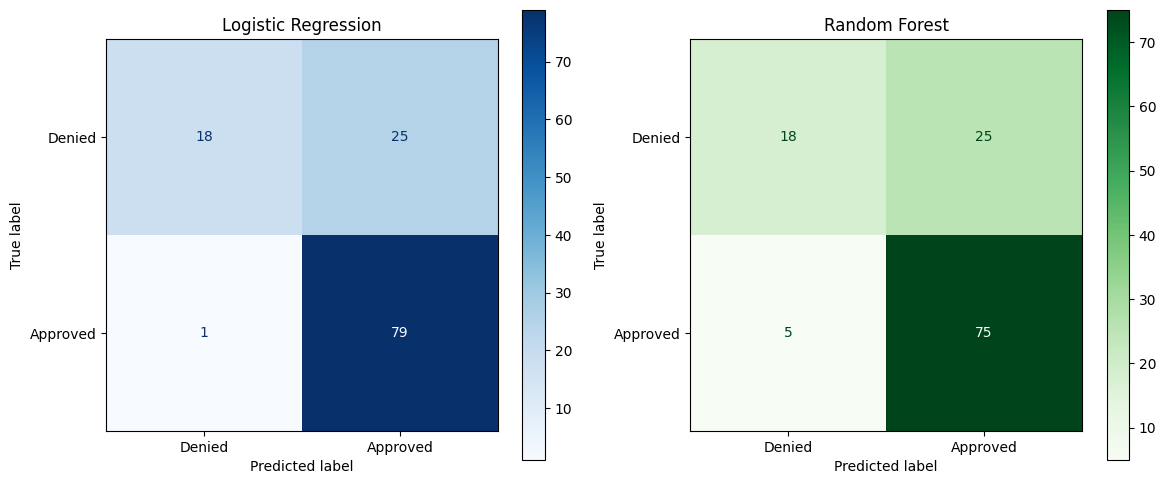

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(cm_lr, display_labels=["Denied", "Approved"]).plot(ax=ax[0], cmap="Blues", values_format='d')
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay(cm_rf, display_labels=["Denied", "Approved"]).plot(ax=ax[1], cmap="Greens", values_format='d')
ax[1].set_title("Random Forest")

plt.tight_layout()
plt.show()
